In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [8]:

df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

# Check for null values
print(df.isnull().sum())





iris = load_iris()
X = iris.data              # Features
y = iris.target            # Labels (0, 1, 2 for each species)


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [3]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #KNN uses distance to compare the data points and if there will be large distance than the one with max distance will dominate so here we scale the data points.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [9]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [11]:
scores = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores.append(score)
    print(f"K={k}, Accuracy={score}")



K=1, Accuracy=0.9777777777777777
K=2, Accuracy=0.9777777777777777
K=3, Accuracy=1.0
K=4, Accuracy=0.9777777777777777
K=5, Accuracy=1.0
K=6, Accuracy=1.0
K=7, Accuracy=1.0
K=8, Accuracy=1.0
K=9, Accuracy=1.0
K=10, Accuracy=1.0


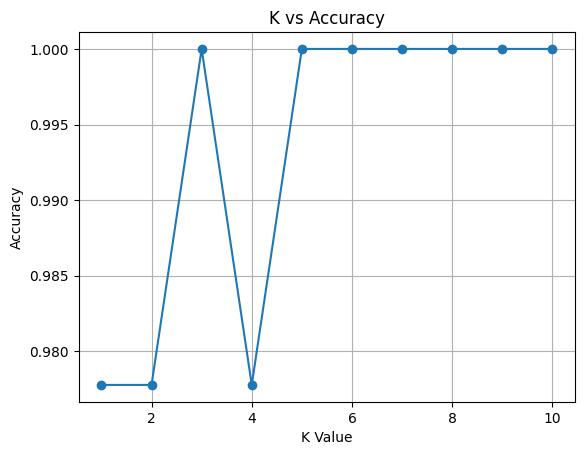

In [12]:
plt.plot(range(1, 11), scores, marker='o')
plt.title("K vs Accuracy")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
